In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#raw_df = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\resources\65262-110-values.csv')

In [4]:
#raw_df = raw_df.sort_values(by=['timestamp'])

In [5]:
#raw_df.dropna(inplace=True)

In [6]:
#raw_df.head()

### Creating a dataset with relevant PGNs

In [7]:
#values = [61443, 61444, 61441, 65247, 65266, 61450, 65248, 65215, 65263, 65213, 64817, 65253, 64777, 65262]

In [8]:
#df_new = raw_df[raw_df['pgn'].isin(values)]

In [9]:
#df_new.to_csv('relevant_data.csv')

Reading the created sub-dataset to perform analytics and create sub systems

In [10]:
df = pd.read_csv('relevant_data.csv')

In [11]:
df["sensor"] = df['pgn'].astype(str) +"-"+ df["spn"].astype(str)

In [12]:
df_copy = df.copy()

In [13]:
df_copy = df_copy.sort_values(by=['timestamp'])

In [14]:
df = df.sort_values(by=['timestamp'])

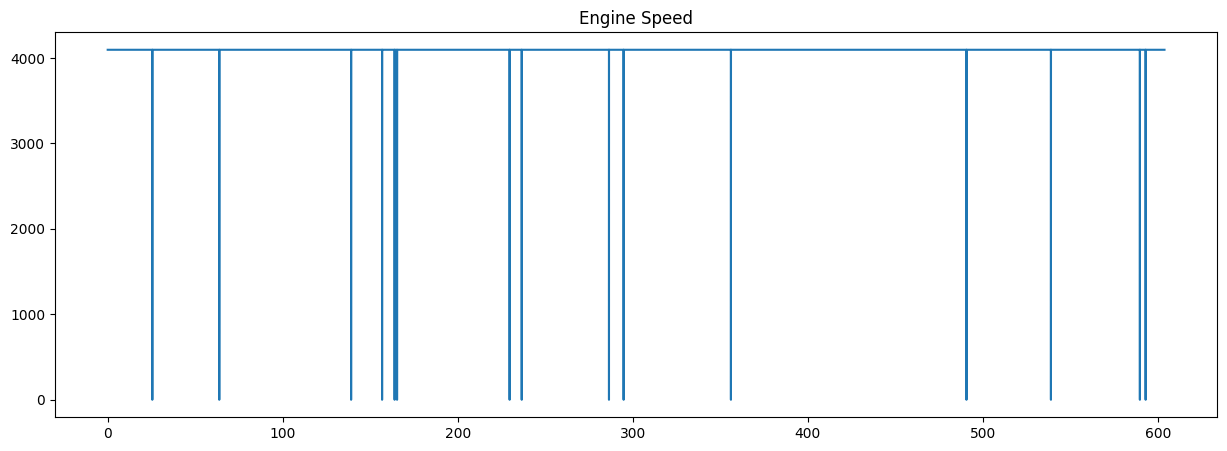

In [16]:
vals = df_copy.loc[(df_copy['sensor']=='64817-1598'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='64817-1598'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals)
plt.title('Fan Speed')
plt.show()

The two graphs below show that the temperature drop in the coolant was a cause of the engine not running.

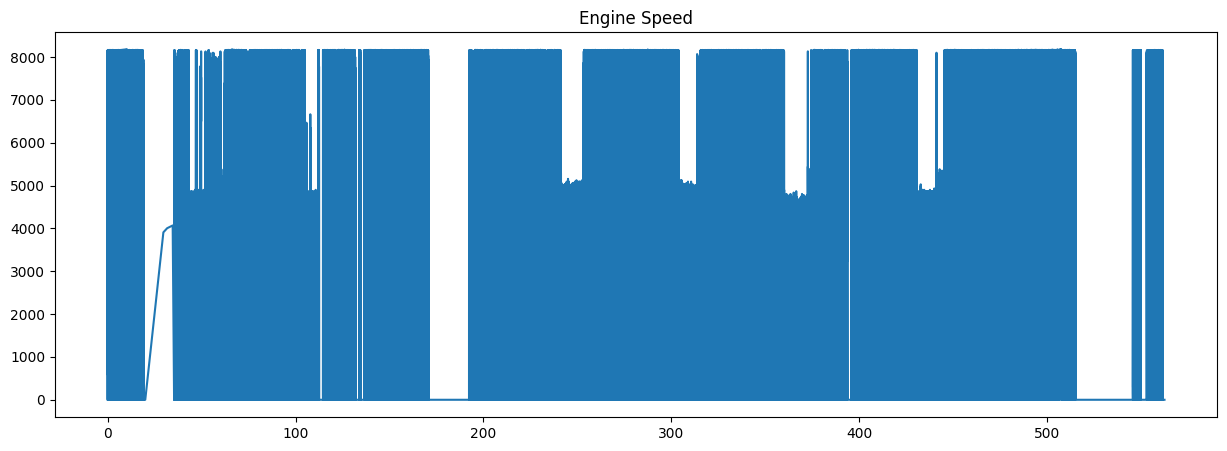

In [41]:
vals = df_copy.loc[(df_copy['sensor']=='61444-190'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61444-190'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals)
plt.title('Engine Speed')
plt.show()

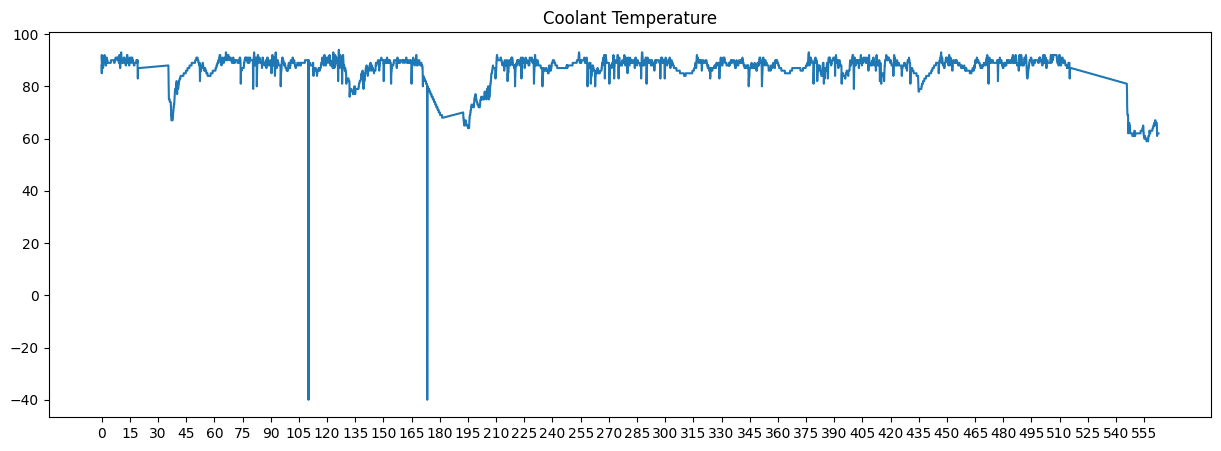

In [18]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals)
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 15.0))
plt.title('Coolant Temperature')
plt.show()

In [19]:
df.head(10)

,Unnamed: 0,timestamp,pgn,spn,decodedValue,sensor
0,47618823,0,61443,2979,0.000,61443-2979
206,54080502,0,61444,4154,0.375,61444-4154
205,54080501,0,61444,899,5.000,61444-899
204,54080500,0,61444,513,5.000,61444-513
203,54080499,0,61444,2432,6.000,61444-2432
202,54080498,0,61444,512,6.000,61444-512
201,65864084,0,61444,190,0.000,61444-190
200,65864083,0,61444,513,0.000,61444-513
199,65864082,0,61444,512,0.000,61444-512
198,70076208,0,65247,514,5.000,65247-514


In [20]:
df.drop(['Unnamed: 0', 'timestamp'], axis=1, inplace=True)

In [21]:
df.head(10)

,pgn,spn,decodedValue,sensor
0,61443,2979,0.000,61443-2979
206,61444,4154,0.375,61444-4154
205,61444,899,5.000,61444-899
204,61444,513,5.000,61444-513
203,61444,2432,6.000,61444-2432
202,61444,512,6.000,61444-512
201,61444,190,0.000,61444-190
200,61444,513,0.000,61444-513
199,61444,512,0.000,61444-512
198,65247,514,5.000,65247-514


Looking at only the engine cooling system

In [22]:
#sensors = ['61441-521', '61441-973', '61443-91', '61443-92', '61443-974', '61443-29', '61443-3357', '61443-5398', '61444-4154', '61444-512', '61444-513', '61444-190', '61444-2432', '61450-2659', '61450-132', '61450-5257', '64817-1550', '64817-1598', '65213-975', '65213-1639', '65247-514', '65247-515', '65247-2978', '65262-110', '65262-174', '65262-175', '65262-176', '65262-52', '65263-94', '65263-22', '65263-98', '65263-100', '65263-101', '65263-109', '65263-111', '65266-183', '65266-184', '65266-185', '65266-51', '65266-3673']
coolsys = ['64817-1598', '65262-110', '65263-111']

Creating a sub dataframe using only the cooling system

In [23]:
df = df[df['sensor'].isin(coolsys)]

In [24]:
df.shape

(92562, 4)

In [25]:
df.head()

,pgn,spn,decodedValue,sensor
1090,64817,1598,4096.0,64817-1598
1259,65263,111,50.0,65263-111
2167,65262,110,88.0,65262-110
3729,65262,110,89.0,65262-110
4118,65263,111,50.0,65263-111


In [26]:
lsofdicts = []
for index,rows in df.iterrows():
    x = rows[3]
    y = rows[2]
    z = {x: y}
    lsofdicts.append(z)
this_df = pd.DataFrame(lsofdicts)

In [27]:
#pd.concat([new_df, z], ignore_index=True)

In [28]:
this_df.head()

,64817-1598,65263-111,65262-110
0,4096.0,NaN,NaN
1,NaN,50.0,NaN
2,NaN,NaN,88.0
3,NaN,NaN,89.0
4,NaN,50.0,NaN


In [29]:
this_df.fillna(method='ffill', inplace=True)
this_df.dropna(inplace=True)
this_df.head(10)

,64817-1598,65263-111,65262-110
2,4096.0,50.0,88.0
3,4096.0,50.0,89.0
4,4096.0,50.0,89.0
5,4096.0,50.0,87.0
6,4096.0,50.0,87.0
7,4096.0,50.0,87.0
8,4096.0,50.0,87.0
9,4096.0,50.0,87.0
10,4096.0,50.0,89.0
11,4096.0,50.0,90.0


<Axes: >

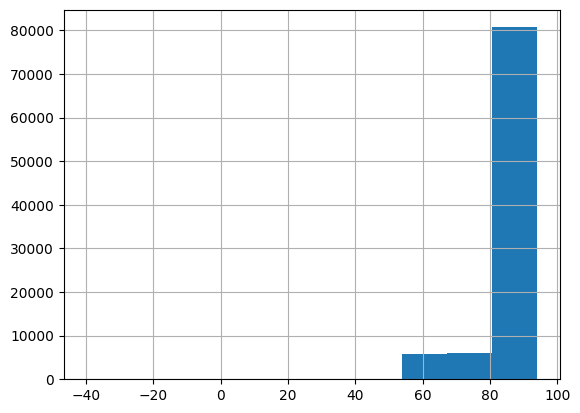

In [30]:
this_df['65262-110'].hist()

<Axes: >

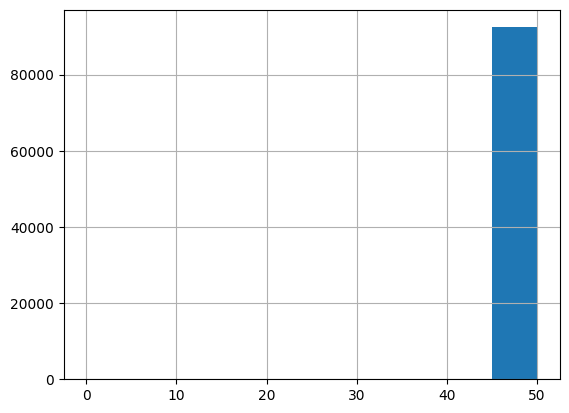

In [31]:
this_df['65263-111'].hist()

In [32]:
this_df.shape

(92560, 3)

In [33]:
this_df.to_csv('cooling_system.csv')

In [34]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

In [35]:
this_df.loc[(this_df['64817-1598']==0), '65262-110'].value_counts().sum() #Checking for how many values was the fan turned off

50

In [37]:
'''                                         #timestamps dictate that the fan turns off for around 2 seconds
counter = 0
couunt = 0
for index, row in this_df.iterrows():
    try:
        prevr = this_df.loc[index-4]
        next = this_df.loc[index+4]
    except:
        print("Bleh")
    if(row[3] == 90.0 and prevr[3] > 90.0):
        counter += 1
    if(row[1]==0):
        print(row[0]/60000)
        
print(counter)
print(couunt)
'''

'                                         #timestamps dictate that the fan turns off for around 2 seconds\ncounter = 0\ncouunt = 0\nfor index, row in this_df.iterrows():\n    try:\n        prevr = this_df.loc[index-4]\n        next = this_df.loc[index+4]\n    except:\n        print("Bleh")\n    if(row[3] == 90.0 and prevr[3] > 90.0):\n        counter += 1\n    if(row[1]==0):\n        print(row[0]/60000)\n        \nprint(counter)\nprint(couunt)\n'

In [45]:
'''Checking for how many readings is the fan off in a sequence'''
counter = 0
for index, row in this_df.iterrows():
    try:
        next = this_df.loc[index+1]
    except:
        print("")
    if(row[0] == 0):
        counter += 1
    if(row[0] == 0 and next[0] != 0):
        print(counter)
        counter = 0
print(counter)

1
5
6
3
4
5
2
4
3
4
6
4
1
1
1

0


The graphs below help understand the dips and rises in the coolant temperature.

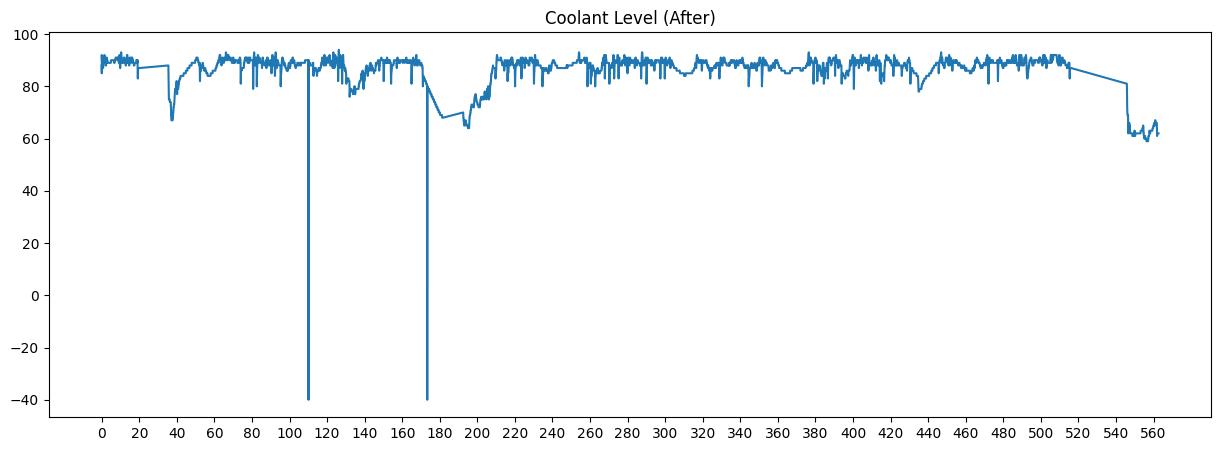

In [53]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals)
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 20.0))
plt.title('Coolant Level (After)')
plt.show()

In [59]:
print(df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['decodedValue']==-40), 'timestamp'])

6903962      6606818
11305315    10400058
Name: timestamp, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


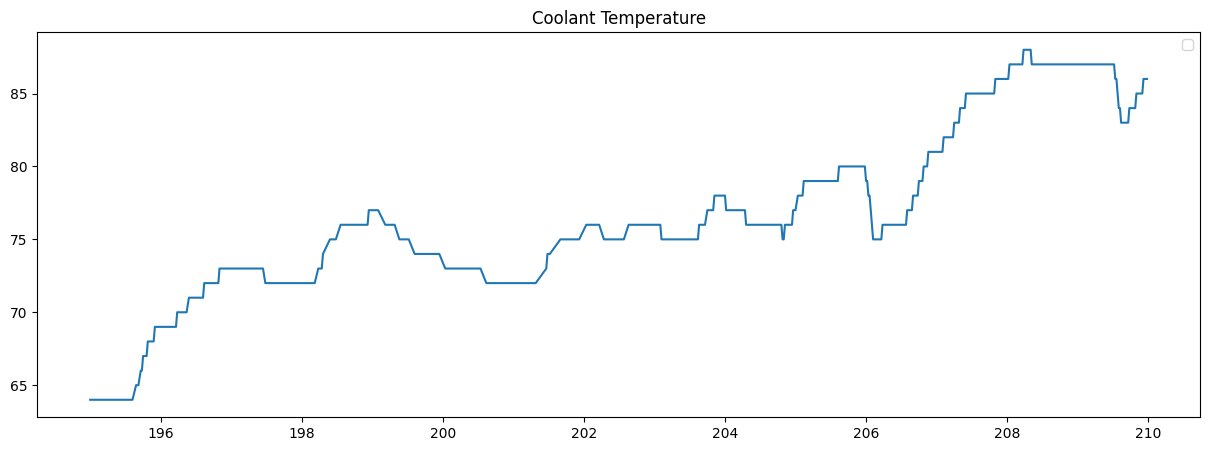

In [70]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 11700000) & (df_copy['timestamp'] < 12600000), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 11700000) & (df_copy['timestamp'] < 12600000), 'timestamp']
ts /= 60000
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Temperature')
plt.legend()
plt.show()

In [71]:
print(len(vals))

634


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


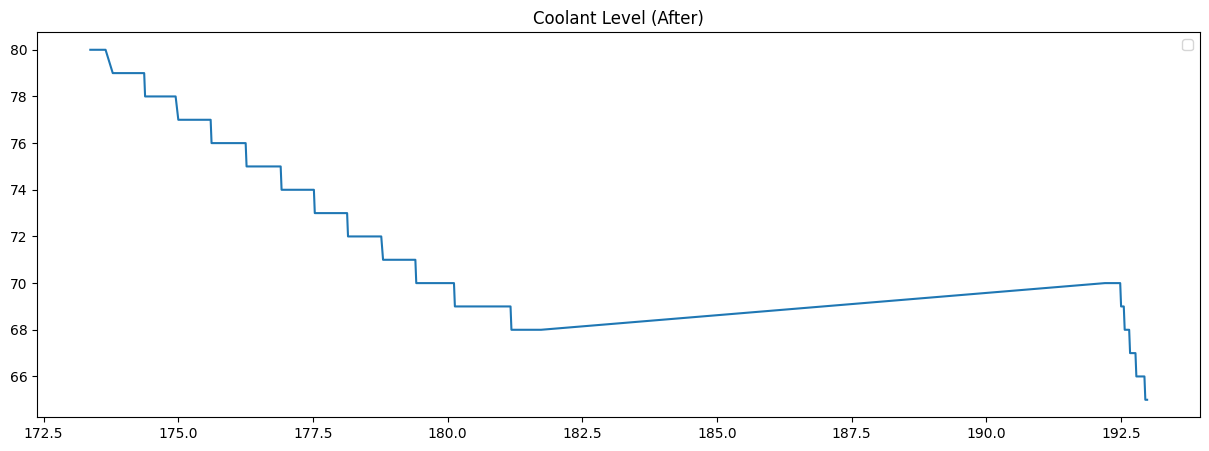

In [72]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 10400058) & (df_copy['timestamp'] < 11580058), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 10400058) & (df_copy['timestamp'] < 11580058), 'timestamp']
ts /= 60000
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.legend()
plt.show()

In [73]:
print(len(vals))

417


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


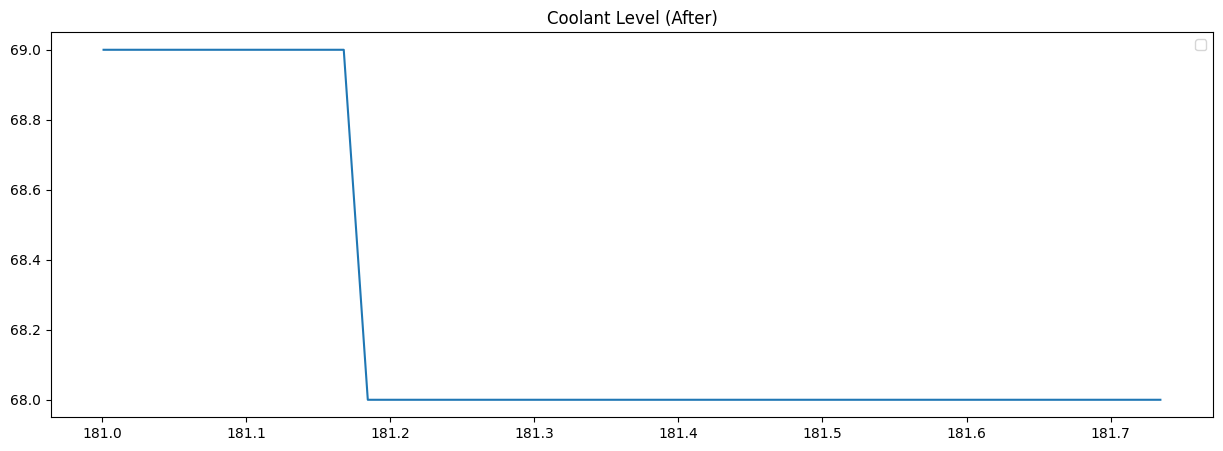

In [76]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 10860000) & (df_copy['timestamp'] < 11520000), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 10860000) & (df_copy['timestamp'] < 11520000), 'timestamp']
ts /= 60000
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.legend()
plt.show()

In [77]:
print(len(vals))

45
